C:\Users\daiki\AppData\Local\Temp\ipykernel_21272\1093230100.py:29: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{title[:10]}.png')
C:\Users\daiki\AppData\Local\Temp\ipykernel_21272\1093230100.py:29: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{title[:10]}.png')
C:\Users\daiki\AppData\Local\Temp\ipykernel_21272\1093230100.py:29: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{title[:10]}.png')
C:\Users\daiki\AppData\Local\Temp\ipykernel_21272\1093230100.py:29: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{title[:10]}.png')
C:\Users\daiki\AppData\Local\Temp\ipykernel_21272\1093230100.py:29: UserWarning: Glyph 25276 (\N{CJK UNIFIED IDEOGRAPH-62BC}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{title[:10]}.png')
C:\Users\daiki\AppData\Local\Temp\

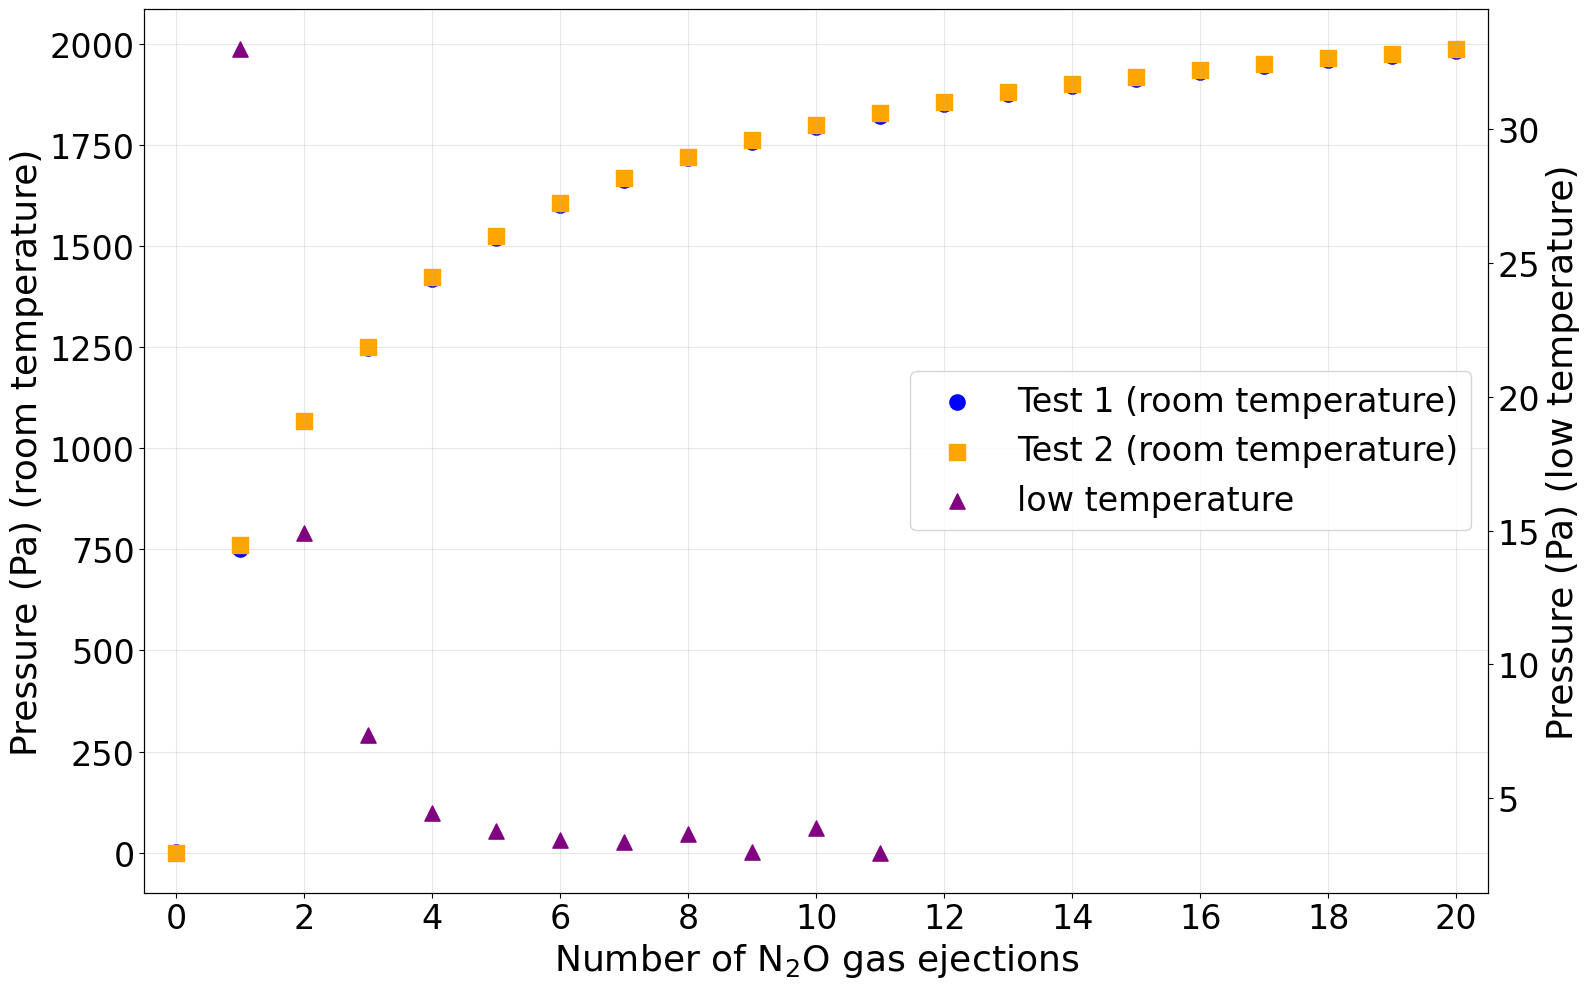

N₂O Gas Ejection Dataを含むグラフが生成されました。


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excelファイルを読み込む
df = pd.read_excel('compress-pressure.xlsx', header=None)

def extract_test_data(df, col_offset):
    time = pd.to_numeric(df.iloc[5:, col_offset], errors='coerce').dropna()
    pressure = pd.to_numeric(df.iloc[5:, col_offset+1], errors='coerce').dropna()
    title = df.iloc[3, col_offset+1]
    
    # 横軸をNumber of N2O gas ejectionsに変更（0から20まで）
    n_ejections = np.arange(0, len(pressure))
    
    return n_ejections, pressure, title

def create_graph(n_ejections, pressure, title):
    plt.figure(figsize=(14, 8))  # プロットサイズを大きく
    plt.scatter(n_ejections, pressure, marker='o', s=50)  # マーカーサイズを大きく
    plt.title(title, fontsize=18)
    plt.xlabel('Number of N2O gas ejections', fontsize=26)
    plt.ylabel('Pressure (Pa)', fontsize=26)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.grid(True)
    # x軸の範囲を0-20に設定
    plt.xlim(-0.5, 20.5)
    plt.xticks(range(0, 21, 2))  # 0, 2, 4, 6, ..., 20の目盛り
    plt.savefig(f'{title[:10]}.png')
    plt.close()

# 一回目のテストデータを抽出してグラフ化
test1_ejections, test1_pressure, test1_title = extract_test_data(df, 0)
create_graph(test1_ejections, test1_pressure, f'Test 1: {test1_title}')

# 二回目のテストデータを抽出してグラフ化
test2_ejections, test2_pressure, test2_title = extract_test_data(df, 3)
create_graph(test2_ejections, test2_pressure, f'Test 2: {test2_title}')

# Low temperature データ（温度は使用せず、圧力のみプロット）
# Number of N2O gas ejections: 1-11
# Pressure (Pa): 33.00, 14.93, 7.37, 4.46, 3.76, 3.45, 3.35, 3.67, 3.00, 3.89, 2.97
# Temperature (K): 98.52, 100.79, 97.08, 98.17, 97.67, 98.54, 102.79, 98.35, 99.72, 102.29, 100.33 (プロットしない)
n2o_ejections = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
n2o_pressure = np.array([33.00, 14.93, 7.37, 4.46, 3.76, 3.45, 3.35, 3.67, 3.00, 3.89, 2.97])

# 両方のテストとN₂O Gas Ejection Dataを1つのグラフに表示（右軸追加）
fig, ax1 = plt.subplots(figsize=(16, 10))

# 左軸（既存のテストデータ）
ax1.scatter(test1_ejections, test1_pressure, marker='o', s=120, label='Test 1 (room temperature)', color='blue')
ax1.scatter(test2_ejections, test2_pressure, marker='s', s=120, label='Test 2 (room temperature)', color='orange')
ax1.set_xlabel('Number of N$_2$O gas ejections', fontsize=26)
ax1.set_ylabel('Pressure (Pa) (room temperature)', fontsize=26, color='black')
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 20.5)
ax1.set_xticks(range(0, 21, 2))

# 右軸（N₂O Gas Ejection Data - 低温データ、圧力のみ）
ax2 = ax1.twinx()
ax2.scatter(n2o_ejections, n2o_pressure, marker='^', s=120, label='low temperature', color='purple')
ax2.set_ylabel('Pressure (Pa) (low temperature)', fontsize=26, color='black')
ax2.tick_params(axis='y', which='major', labelsize=24, colors='black')

# 凡例を統合
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=24, loc='center right')

plt.tight_layout()
plt.savefig('comparison_graph_with_n2o.png', dpi=300, bbox_inches='tight')
plt.show()

print("N₂O Gas Ejection Dataを含むグラフが生成されました。")
